Completed by Ekaterina Tyukavkina, Igor Malysh

# Task 8. Time series analysis (optional, you can get 2 points)

Find any time series containing at least 100 values and at least 5 missing values (if there are no missing values in the original data, you may delete some random values yourself). Please, complete the following tasks:

Шn this project I used LLM model as an assistant, not as the main author of the analysis.
Specifically:


I requested recommendations for formatting graphs and Markdown comments so that the notebook is consistent.

All data loading, writing code, execution of code, interpretation of results, and final conclusions were done by me,
based on the dataset and the course requirements.


LLM was used as a support tool for:

Speed up the search for Python libraries,

Speeding up the writing of small pieces of code,

checking the correctness of statistical methods

Therefore, LLM was not the author of the work, but a helper for coding and structuring. The ideas, analysis, choice of variables, and interpretation remain my own.

In [60]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('ufo.csv')

print(f'Shape before deleting missing values: {df.shape}')

# no missing values
print(f'Number of missing values: {df.Time.isna().sum()}')

# delete 5 % of random rows
df = df.drop(df.sample(frac=0.05, random_state=42).index)

print(f'Shape after deleting random values: {df.shape}')

df

Shape before deleting missing values: (18241, 5)
Number of missing values: 0
Shape after deleting random values: (17329, 5)


,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...,...
18234,Capitola,NaN,TRIANGLE,CA,12/31/2000 22:00
18235,Fountain Hills,NaN,NaN,AZ,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45


In [61]:
df.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [62]:
df.Time = pd.to_datetime(df.Time)

In [63]:
print("Earliest date :", df["Time"].min())
print("Latest date   :", df["Time"].max())
print("Timespan      :", df["Time"].max() - df["Time"].min())

Earliest date : 1930-06-01 22:00:00
Latest date   : 2000-12-31 23:59:00
Timespan      : 25781 days 01:59:00


In [64]:
df = df.set_index("Time")

1. Plot a graph visualizing the time series. Describe its characteristics — trend, seasonality, cycles.

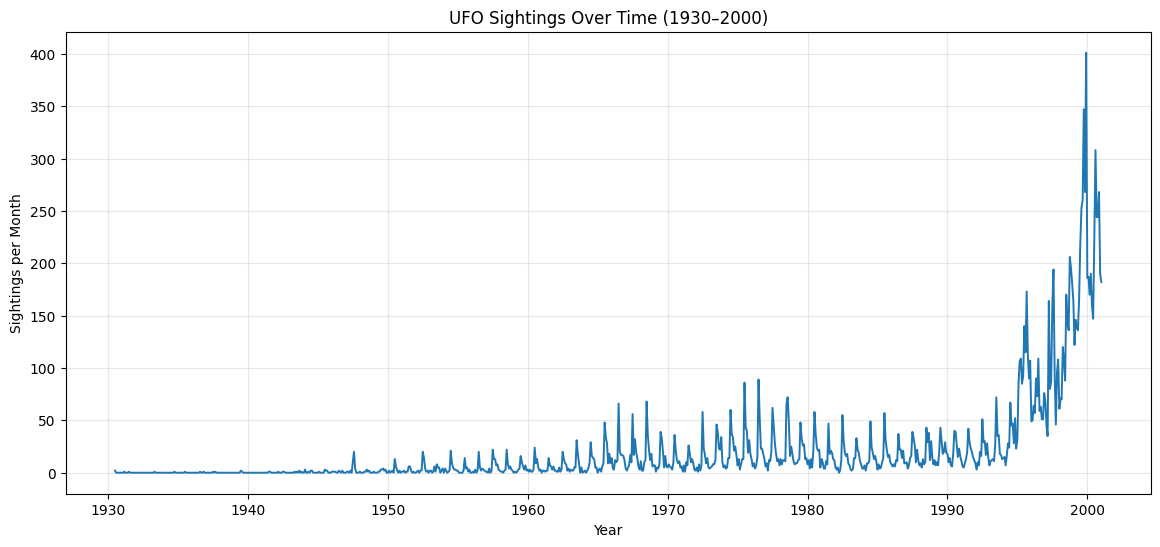

In [66]:
# Monthly sightings
ts = df.resample("ME").size()

plt.figure(figsize=(14,6))
plt.plot(ts, linewidth=1.4)
plt.title("UFO Sightings Over Time (1930–2000)")
plt.xlabel("Year")
plt.ylabel("Sightings per Month")
plt.grid(True, alpha=0.3)
plt.show()



### Trend

The long-term trend shows three distinct phases:

**1930–1965 -> Very low activity (under 50 sightings/year)**

Sightings are rare and relatively flat.
This reflects limited reporting systems, low awareness, and minimal media coverage.

**1965–1995 -> Moderate growth (40–100 sightings/year)**

Sightings gradually increase over these decades. Possible reasons:
- Space Race era
- Increased aviation activity
- Growing UFO culture in media
- Improved reporting mechanisms

**1995–2000 -> Dramatic surge (from 50-100 to 400 sightings/year)**

Almost exponential jump occurs at the end of the series. Likely influenced by:
- Internet adoption (online reporting)
- Major media exposure
- Increased public interest


The series shows a long period of low activity, a mid-century growth phase, and a major late-century surge.

In [68]:
monthly = df.resample("ME").size().to_frame("count")
pre_1965     = monthly.loc[: "1964-12-31"]
mid_1965_95  = monthly.loc["1965-01-01" : "1995-12-31"]
post_1995    = monthly.loc["1996-01-01" : "2000-12-31"]


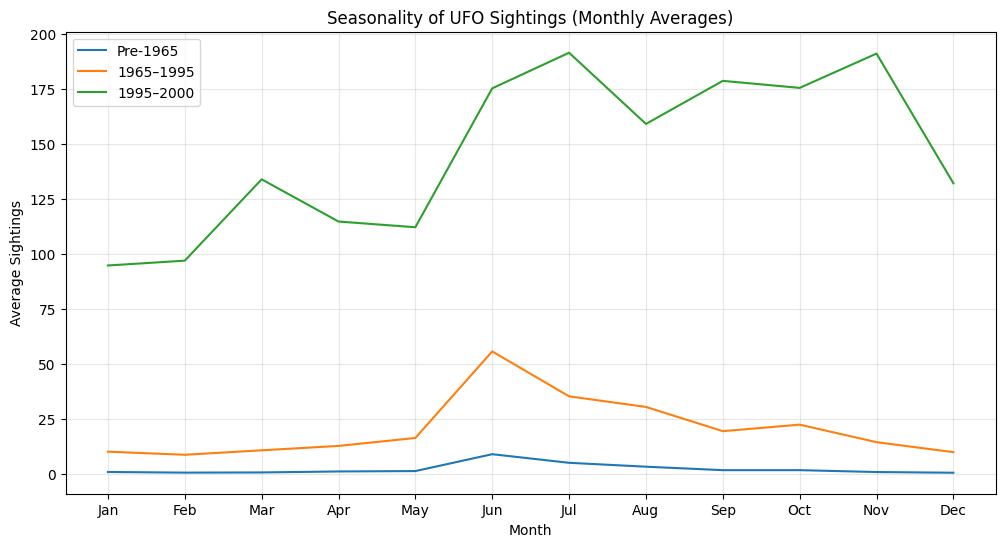

In [69]:
plt.figure(figsize=(12,6))

plt.plot(pre_1965.groupby(pre_1965.index.month).mean(), label="Pre-1965")
plt.plot(mid_1965_95.groupby(mid_1965_95.index.month).mean(), label="1965–1995")
plt.plot(post_1995.groupby(post_1995.index.month).mean(), label="1995–2000")

plt.xticks(range(1,13), ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.title("Seasonality of UFO Sightings (Monthly Averages)")
plt.xlabel("Month")
plt.ylabel("Average Sightings")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


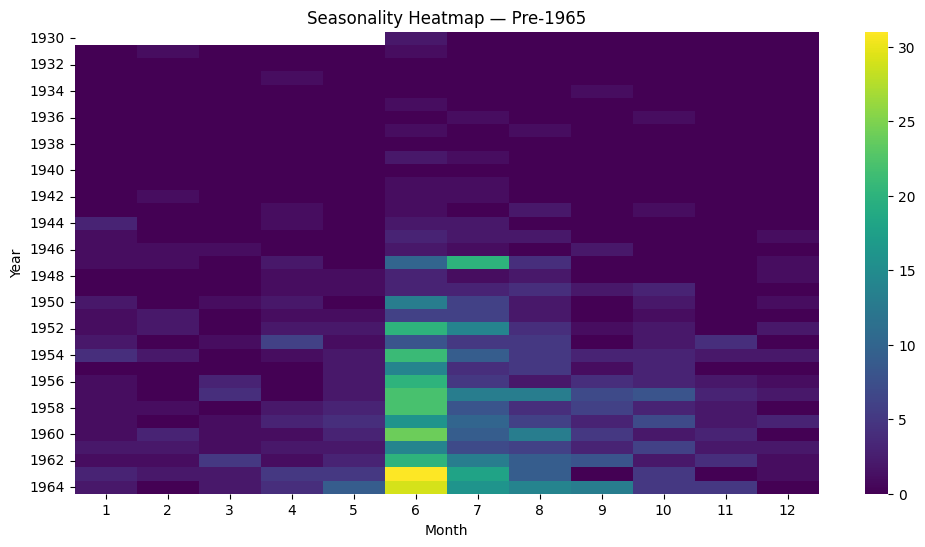

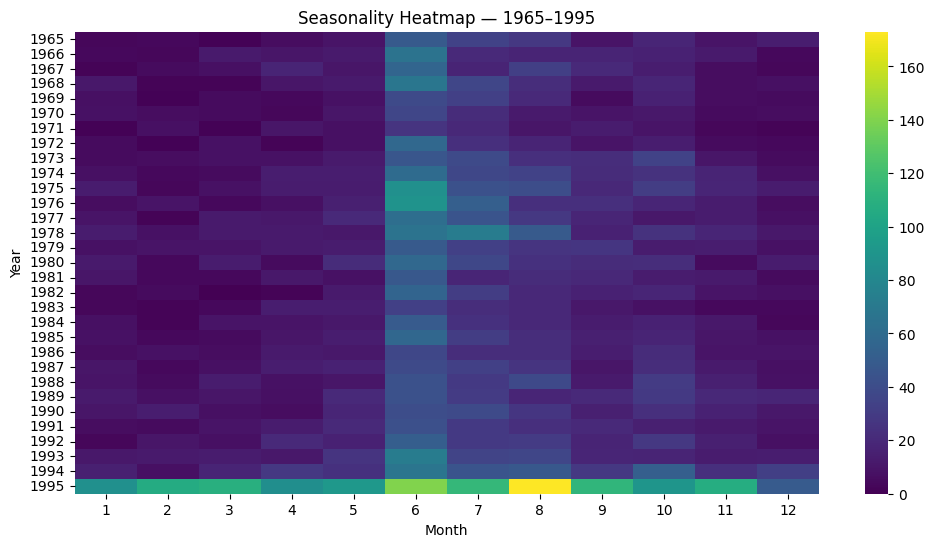

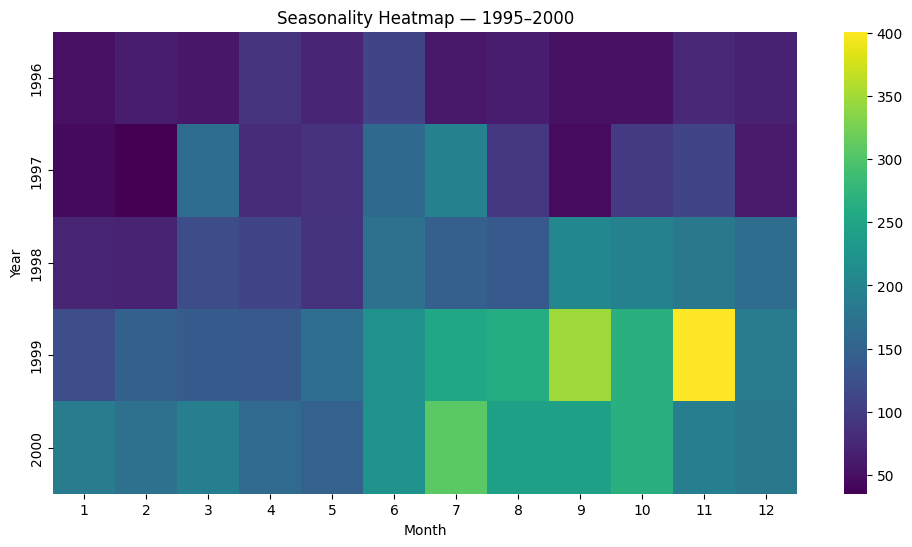

In [70]:
import seaborn as sns

def season_heatmap(data, title):
    df_hm = data.copy()
    df_hm["year"] = df_hm.index.year
    df_hm["month"] = df_hm.index.month
    pivot = df_hm.pivot_table(values="count", index="year", columns="month")

    plt.figure(figsize=(12,6))
    sns.heatmap(pivot, cmap="viridis")
    plt.title(title)
    plt.xlabel("Month")
    plt.ylabel("Year")
    plt.show()

season_heatmap(pre_1965, "Seasonality Heatmap — Pre-1965")
season_heatmap(mid_1965_95, "Seasonality Heatmap — 1965–1995")
season_heatmap(post_1995, "Seasonality Heatmap — 1995–2000")


### Seasonality
Seasonality in the 1930–1995 period shows a stable pattern with clear summer peaks occurring between June and August. 
However, in the 1995–2000 period, this seasonal structure changes dramatically: sightings do not decline after summer; instead, the peak extends from June through December, with unusually high activity in the autumn months. October 1999 exhibits an extreme outlier with nearly 400 sightings, creating one of the largest spikes in the entire dataset. 

This shift suggests a structural break in seasonal behavior, likely driven by changes in reporting mechanisms (e.g., emergence of internet UFO databases), heightened media attention, or clustered mass-sighting events.


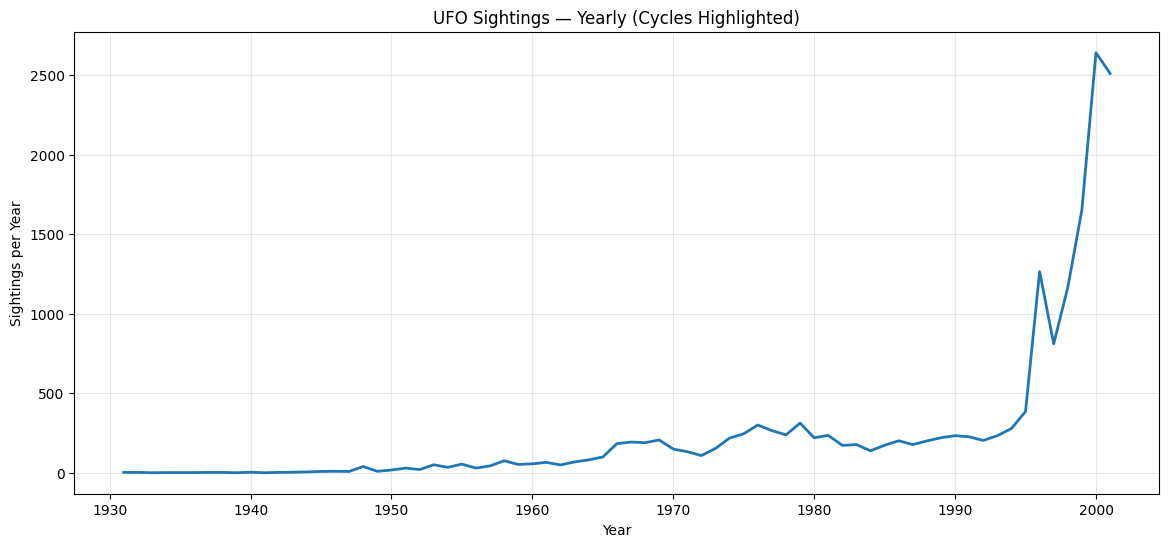

In [72]:
yearly = df.resample("YE").size()

plt.figure(figsize=(14,6))
plt.plot(yearly, linewidth=2)
plt.title("UFO Sightings — Yearly (Cycles Highlighted)")
plt.xlabel("Year")
plt.ylabel("Sightings per Year")
plt.grid(True, alpha=0.3)
plt.show()


2. Restore the missing values. Justify and describe the method you will use to fill in the missing data.

In [79]:
# Time-based interpolation
# Justification: this approach respects the trend and cycles in the UFO time series.
df = df.sort_index()
monthly = df.resample("ME").size().to_frame("count")
monthly = monthly.asfreq("ME")
monthly = monthly.interpolate(method="time")


3. Try to transform the time series into a stationary form. Justify and describe the methods you used. Provide a plot and statistical test results confirming that the series has become stationary.

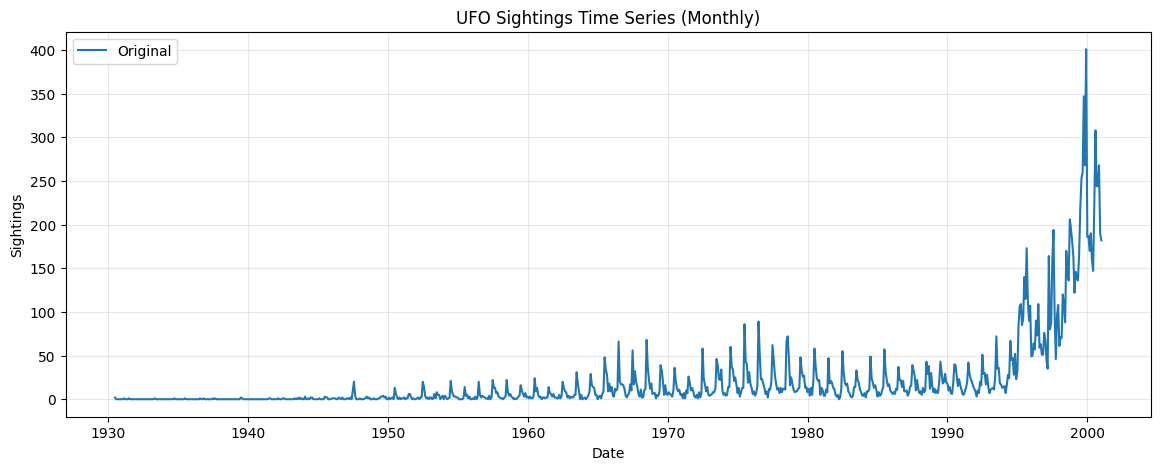

In [80]:
ts = monthly["count"]

plt.figure(figsize=(14,5))
plt.plot(ts, label="Original")
plt.title("UFO Sightings Time Series (Monthly)")
plt.xlabel("Date")
plt.ylabel("Sightings")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


In [83]:
# .diff() - Trend removal (subtracts the previous value from each observation)
# .diff(12) - Seasonality removal (removes repeating yearly pattern, e.g. June peak)
ts_stationary = ts.diff().diff(12).dropna()


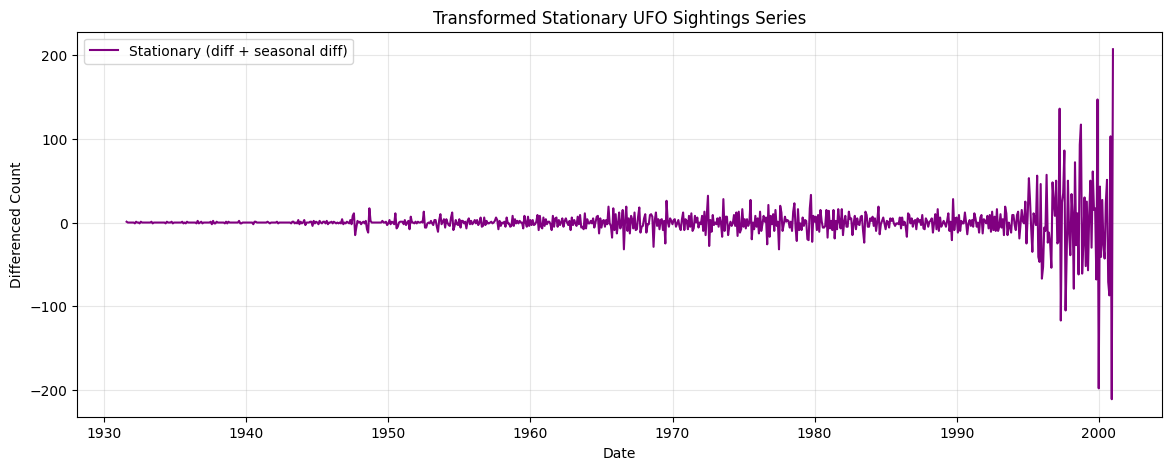

In [84]:
# Negative values simply represent months where sightings were below the level implied by the trend + seasonal pattern
plt.figure(figsize=(14,5))
plt.plot(ts_stationary, color="purple", label="Stationary (diff + seasonal diff)")
plt.title("Transformed Stationary UFO Sightings Series")
plt.xlabel("Date")
plt.ylabel("Differenced Count")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


In [86]:
from statsmodels.tsa.stattools import adfuller


# H0: The series is non-stationary
# Reject null if p-value < 0.05
adf_result = adfuller(ts_stationary)
print("ADF Statistic: {:.4f}".format(adf_result[0]))
print("p-value: {:.4f}".format(adf_result[1]))
for key, value in adf_result[4].items():
    print("Critical Value ({}): {:.4f}".format(key, value))


ADF Statistic: -9.9063
p-value: 0.0000
Critical Value (1%): -3.4384
Critical Value (5%): -2.8651
Critical Value (10%): -2.5687


**p-value: 0.0000** - reject H0  
**ADF Statistic: -9.9063** - smaller than even the 1% critical value, meaning the test is extremely confident in stationarity

4. Create and describe the correlograms (plots of the autocorrelation function and partial autocorrelation function) for the time series.

<Figure size 1400x500 with 0 Axes>

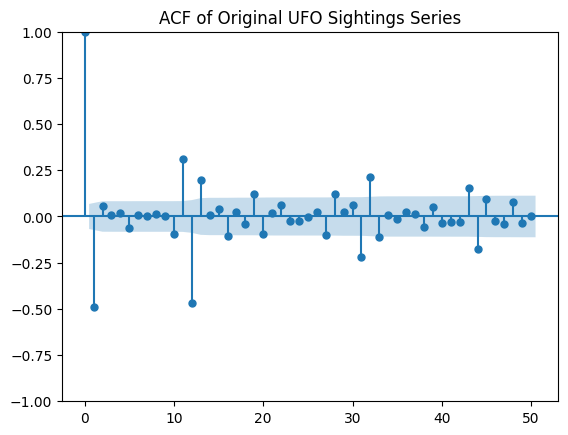

<Figure size 1400x500 with 0 Axes>

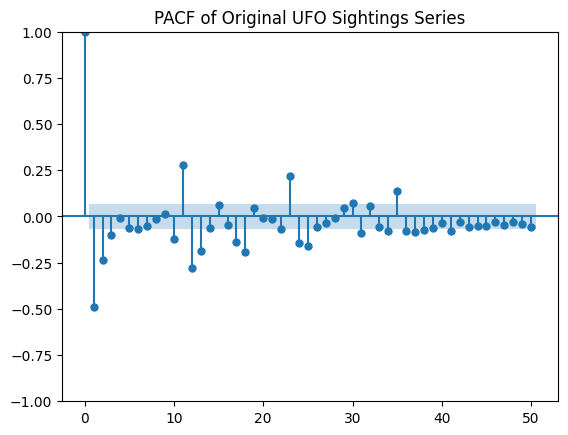

In [91]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


plt.figure(figsize=(14,5))
plot_acf(ts_stationary, lags=50, alpha=0.05)  # 50 lags (~4 years if monthly)
plt.title("ACF of Original UFO Sightings Series")
plt.show()

plt.figure(figsize=(14,5))
plot_pacf(ts_stationary, lags=50, alpha=0.05, method='ywm')  # 'ywm' handles long series better
plt.title("PACF of Original UFO Sightings Series")
plt.show()

### ACF (Autocorrelation Function)
- Sign changes in ACF (positive -> negative -> positive -> ...) are typical of stationary series with oscillatory behavior.
- Periodicity indicates cyclical patterns, which could be seasonal (monthly/annual) or inherent cycles in the data.

### PACF (Partial Autocorrelation Function)
- First lag PACF drop is characteristic of a strong AR(1) component, but the negative sign suggests alternating effect, like an AR(2) with negative coefficient.
- The slight growth after lag 1 and periodicity indicate higher-order AR structure, possibly AR(2) or AR(3) with oscillatory roots.
- Periodicity aligns with what ACF shows — repeating cycles.

### Conclusion
- The series appears stationary.
- The autocorrelation structure suggests AR(2) or AR(3) type behavior, possibly with seasonal effects.

5. Split the dataset into train and test samples (justify your choice of the time interval for the test sample). Based on the training data, identify the parameters of the ARIMA or SARIMA models. Evaluate the model’s quality — how well does it predict the values in the test sample?

In [100]:
ts_stationary

Time
1931-07-31      1.0
1931-08-31      0.0
1931-09-30      0.0
1931-10-31      0.0
1931-11-30      0.0
              ...  
2000-08-31    -71.0
2000-09-30    -87.0
2000-10-31    103.0
2000-11-30   -211.0
2000-12-31    207.0
Freq: ME, Name: count, Length: 834, dtype: float64

In [104]:
""" 
Split train/test
    A test set is 10–20% of data for evaluating forecasting performance
    Picked last 10 years (1991–2000) as the test set because:
     - Long enough to evaluate model stability over multiple periods
     - Represents the “future” the model would forecast
"""

train = ts_stationary[:'1990-12-31']
test = ts_stationary['1991-01-31':]

print(f"Train length: {len(train)}, Test length: {len(test)}")


Train length: 714, Test length: 120


In [105]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA(2,0,1)
model = ARIMA(train, order=(2,0,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  count   No. Observations:                  714
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -2260.113
Date:                Thu, 20 Nov 2025   AIC                           4530.225
Time:                        22:03:14   BIC                           4553.080
Sample:                    07-31-1931   HQIC                          4539.052
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.001      0.216      0.829      -0.002       0.003
ar.L1          0.1812      0.025      7.276      0.000       0.132       0.230
ar.L2          0.0381      0.027      1.412      0.1

### Model's quality

#### Coefficient interpretation
- **AR(1) significant:** the series shows short-term memory
- **AR(2) not significant:** may not be needed, ARIMA(1,0,1) could be simpler
- **MA(1) negative and significant:** the model reacts strongly to past shocks
- **Mean (const) near zero:** consistent with stationary data

#### Model diagnostics
**Ljung-Box Q (L1): 0.00, Prob(Q)=0.95**  
No significant autocorrelation in residuals means that residuals are approximately white noise

**Jarque-Bera (JB) = 1718.82, Prob=0.00**  
Residuals are not normally distributed which is sign of heavy tails (kurtosis = 10.58)

**Heteroskedasticity (H) = 15.2, Prob(H) = 0.00**  
Residual variance is not constant, this means volatility clustering might exist

**Skew = -0.27**  
Model has light negative skew, not severe

#### Conclusion
- The model fits autocorrelation structure well (white-noise residuals).
- Non-normality and heteroskedasticity are present — typical for count data; may consider GARCH or transformation if modeling extremes is important.

6. Forecast the time series for 30 periods ahead. How realistic do you think the obtained forecast is?

In [106]:
# Forecast 30 months ahead
forecast_30 = model_fit.get_forecast(steps=30)
forecast_mean = forecast_30.predicted_mean
forecast_ci = forecast_30.conf_int()

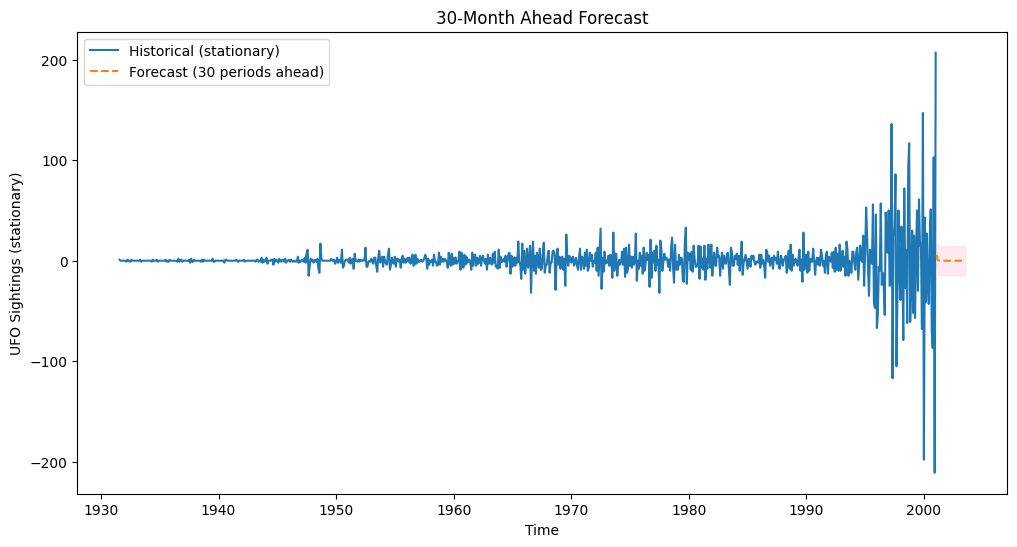

In [117]:
plt.figure(figsize=(12,6))
plt.plot(ts_stationary.index, ts_stationary, label='Historical (stationary)')
plt.plot(pd.date_range(ts_stationary.index[-1] + pd.offsets.MonthEnd(1), 
                       periods=30, freq='ME'), forecast_mean, 
         label='Forecast (30 periods ahead)', linestyle='--')
plt.fill_between(pd.date_range(ts_stationary.index[-1] + pd.offsets.MonthEnd(1), 
                              periods=30, freq='ME'),
                 forecast_ci.iloc[:,0], forecast_ci.iloc[:,1], color='pink', alpha=0.3)
plt.xlabel('Time')
plt.ylabel('UFO Sightings (stationary)')
plt.title('30-Month Ahead Forecast')
plt.legend()
plt.show()


**We need to transform back to the original scale, because we can not treat negative values or raw forecast values as actual UFO counts**

In [113]:
forecast_stationary = model_fit.forecast(steps=30)

# last 13 points of the original series
x_last_13 = ts[-13:].values  # numpy array

forecast_stationary_values = forecast_stationary.values  # 30 points
forecast_original = []

# initialize with last 13 original points
history = list(x_last_13)  # x_{t-13} ... x_{t-1}

for i in range(len(forecast_stationary_values)):
    # formula: x_t = y_t + x_{t-1} + x_{t-12} - x_{t-13}
    x_t = forecast_stationary_values[i] + history[-1] + history[-12] - history[-13]
    forecast_original.append(x_t)
    history.append(x_t)  # append for next iteration

# convert to pandas Series
forecast_original = pd.Series(forecast_original, 
                              index=pd.date_range(ts.index[-1]+pd.offsets.MonthEnd(1), periods=len(forecast_stationary_values), freq='ME'))


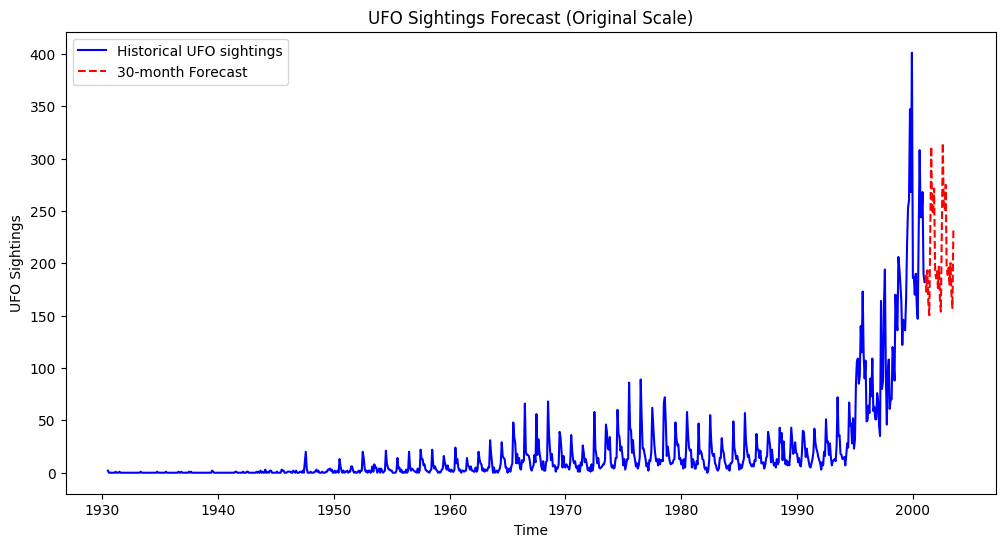

In [114]:
# Plot historical + forecast
plt.figure(figsize=(12,6))
plt.plot(ts, label='Historical UFO sightings', color='blue')
plt.plot(forecast_original, label='30-month Forecast', linestyle='--', color='red')
plt.xlabel('Time')
plt.ylabel('UFO Sightings')
plt.title('UFO Sightings Forecast (Original Scale)')
plt.legend()
plt.show()


### Overall conclusion
The forecast looks realistic because:
- Seasonality preserved: yearly peaks remain;
- Slightly lower magnitude: max sightings drop from ~400 to a stable ~300;
- Smooth continuation: no negative counts or extreme spikes.  

This matches probable historical context: the UFO “boom” ended, but baseline reporting (~300/month) continues  
Also, we must remember about limitations: ARIMA can’t predict sudden external events, forecast assumes historical patterns continue

Comments on the task and principles of its assessment:

- All points of the task must be accompanied by _executed_ code fragments.
- All results of the code execution (statistics, graphs, tables) should be commented, conclusions in the written form should be made based on them.
- The task can be completed individually or in a group of 2 students, the assessment criteria will be the same.
- If the task is completed by 2 students, then only one of the students should upload the work to SmartLMS.
- The name of the file uploaded to SmartLMS should include the last name(s) of the author(s) of the work.
- If you use AI in the work, you must indicate where and how exactly it was used.

### Please upload the Jupyter Notebook with comments and answers in SmartLMS. The deadline is 20 November 23:55. 